In [1]:
# Import libraries
import sys
import os
import pandas as pd
import h5py
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import json 
import h5py
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tqdm import tqdm
import os
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK#, pointsToVTKAsTIN
from sklearn.cluster import DBSCAN
from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK

In [2]:
MYPREFIX='/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI'
CWD = os.getcwd()
sys.path.append(MYPREFIX)
! echo $PWD

/talos/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/tests


In [3]:
from compositionspace.datautils import Prepare_data
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import Composition_clustering
from compositionspace.postprocessing import Postprocess_data

In [4]:
Vox_centroid_file = '/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_voxel_cetroids_phases.h5'
Vox_ratios = "/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_voxel_composition.h5"
Slices_file = '/u/gazal/Composition_Nfdi_git/output/output_voxels/Output_big_slices.h5'

In [5]:
with h5py.File(Slices_file , "r") as hdfr:
    group1 = hdfr.get("Group_xyz_Da_spec")
    Chem_list =list(list(group1.attrs.values())[1])

In [6]:
len(Chem_list)

31

In [7]:
Chem_list

['Al:1',
 'B:1',
 'C:1',
 'C:1 O:2',
 'Co:1',
 'Cr:1',
 'Cu:1',
 'Fe:1',
 'Ga:1',
 'H:1',
 'H:2',
 'Hf:1',
 'Mn:1',
 'Mo:1',
 'Nb:1',
 'Ni:1',
 'O:1',
 'O:1 H:1',
 'O:1 H:2',
 'P:1',
 'Re:1',
 'Re:1 C:1',
 'Re:1 H:1',
 'Re:2 H:1',
 'Si:1',
 'Ta:1',
 'Ti:1',
 'V:1',
 'W:1',
 'W:1 C:1',
 'W:2']

In [8]:
with h5py.File(Vox_ratios , "r") as hdfr:
    ratios = np.array(hdfr.get("vox_ratios"))
    group2 = hdfr.get("vox_ratios")
    #Group_name = list(list(hdfr.attrs.values())[1])

In [42]:
phase = 1
with h5py.File(Vox_centroid_file , "r") as hdfr:
    Phase1_cent_arr = np.array(hdfr.get(f"{phase}/{phase}"))
    group1 = hdfr.get(f"{phase}")
    Phase1_cent_columns = list(list(group1.attrs.values())[0])
    #Group_name = list(list(hdfr.attrs.values())[1])
Phase1_cent =pd.DataFrame(data=Phase1_cent_arr, columns=Phase1_cent_columns)
Phase1_cent.head()
print(len(Phase1_cent))

phase = 2
with h5py.File(Vox_centroid_file , "r") as hdfr:
    Phase2_cent_arr = np.array(hdfr.get(f"{phase}/{phase}"))
    group2 = hdfr.get(f"{phase}")
    Phase2_cent_columns = list(list(group2.attrs.values())[0])
    #Group_name = list(list(hdfr.attrs.values())[1])
Phase2_cent =pd.DataFrame(data=Phase2_cent_arr, columns=Phase2_cent_columns)
Phase2_cent.head()
print(len(Phase2_cent))

phase = 3
with h5py.File(Vox_centroid_file , "r") as hdfr:
    Phase3_cent_arr = np.array(hdfr.get(f"{phase}/{phase}"))
    group3 = hdfr.get(f"{phase}")
    Phase3_cent_columns = list(list(group3.attrs.values())[0])
    #Group_name = list(list(hdfr.attrs.values())[1])
Phase3_cent =pd.DataFrame(data=Phase3_cent_arr, columns=Phase3_cent_columns)
Phase3_cent.head()
print(len(Phase3_cent))

23616
30636
55741


In [43]:
files2 = Phase2_cent["file_name"].values.astype(int)
files1 = Phase1_cent["file_name"].values.astype(int)

ratios_ph2 = ratios[files2]
ratios_ph1 = ratios[files1]

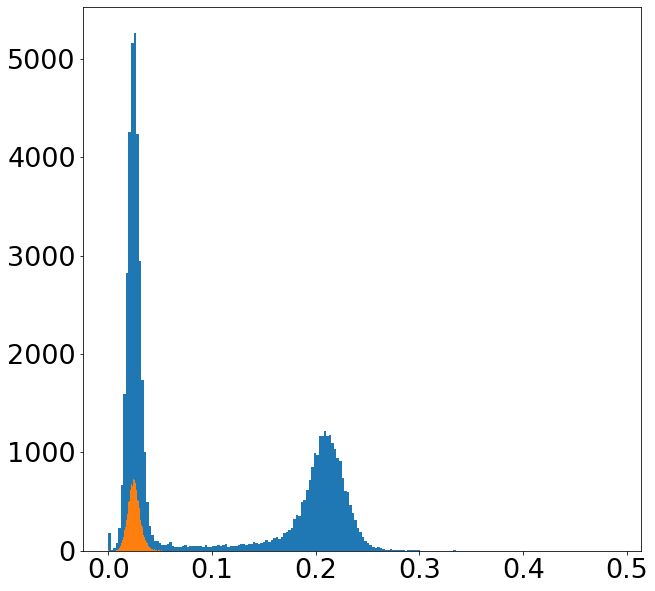

In [44]:
plt.hist(ratios[:,5], bins = 200);
plt.hist(ratios_ph2[:,5], bins = 200);


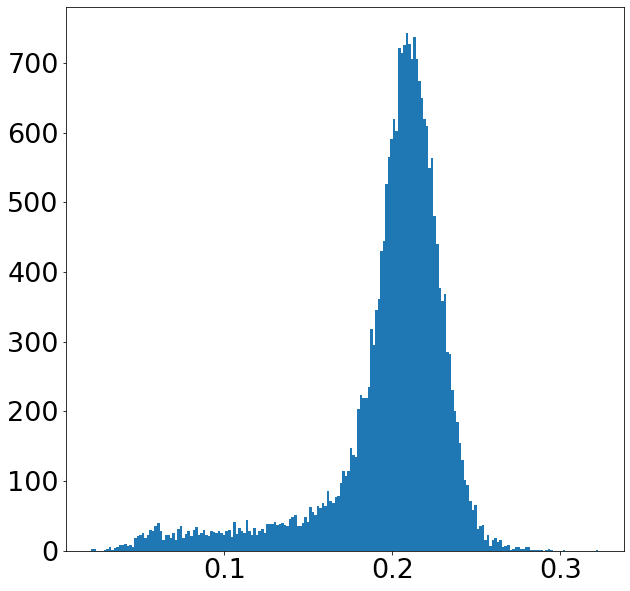

In [45]:
plt.hist(ratios_ph1[:,5], bins = 200);

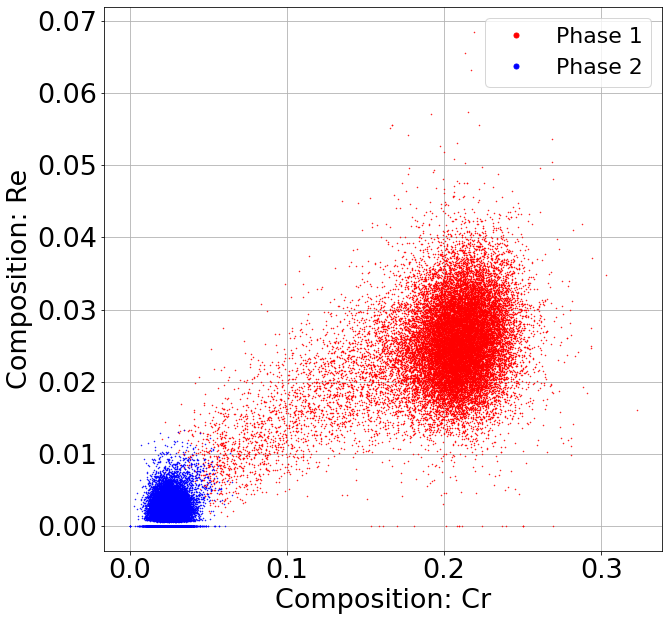

In [46]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 27})
plt.plot(ratios_ph1[:,5], ratios_ph1[:,20], "o", color='r',markersize = 0.5, label = "Phase 1" )
plt.plot(ratios_ph2[:,5], ratios_ph2[:,20], "o", color='b',markersize = 0.5,label = "Phase 2")
plt.xlabel("Composition: Cr")
plt.ylabel("Composition: Re")
plt.grid()
plt.legend(markerscale =10,fontsize =22)

In [47]:
X_vox = np.hstack((ratios_ph1[:,5].reshape(-1,1), ratios_ph1[:,20].reshape(-1,1), ratios_ph1[:,-1].reshape(-1,1)))


100%|██████████| 9/9 [00:03<00:00,  2.32it/s]


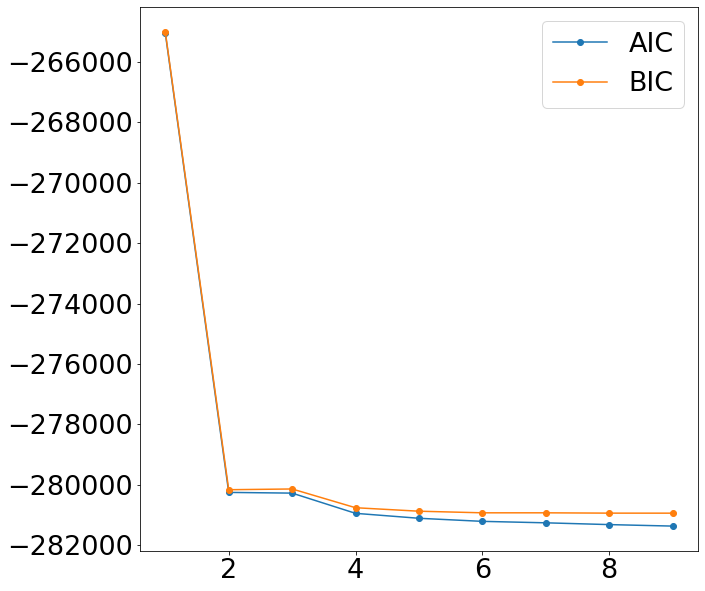

In [48]:
gm_scores=[]
aics=[]
bics=[]
n_clusters=list(range(1,10))
X=  X_vox[:,0:2]
for n_cluster in tqdm(n_clusters):
    gm = GaussianMixture(n_components=n_cluster,verbose=0)
    gm.fit(X)
    y_pred=gm.predict(X)
    #gm_scores.append(homogeneity_score(y,y_pred))
    aics.append(gm.aic(X))
    bics.append(gm.bic(X))


plt.plot(n_clusters, aics, "-o",label="AIC")
plt.plot(n_clusters, bics, "-o",label="BIC")
plt.legend()
plt.show()

In [49]:
gm = GaussianMixture(n_components=2, max_iter=100000,verbose=0)
gm.fit(X)
y_pred=gm.predict(X)

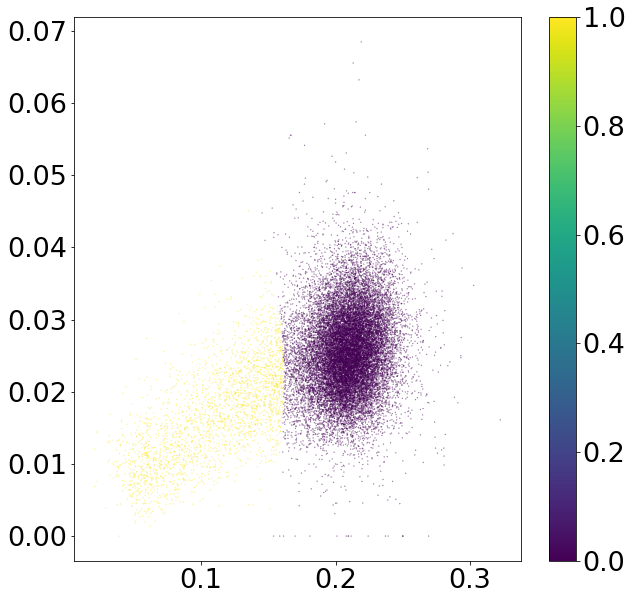

In [50]:
plt.scatter(ratios_ph1[:,5], ratios_ph1[:,20], s= 0.05,c= y_pred)
plt.colorbar()

In [51]:
interface_files = ratios_ph1[np.argwhere(y_pred == 1).flatten()][:,-1].astype(int)

id_list = []
for i in range(len(interface_files)):
    id_list.append(np.argwhere(Phase3_cent_arr[:,-1]==interface_files[i])[0][0])
id_list = np.array(id_list)

In [53]:

image = Phase3_cent_arr[id_list][:,0:3]
FILE_PATH1 = "interface"
x = np.ascontiguousarray(image[:,0])
y= np.ascontiguousarray(image[:,1])
z = np.ascontiguousarray(image[:,2])
pointsToVTK(FILE_PATH1,x,y,z,   )

'/talos/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/tests/interface.vtu'

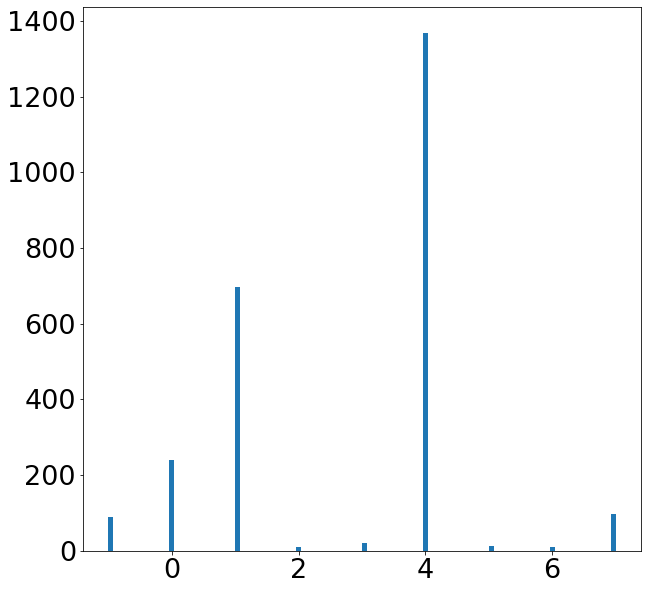

In [54]:
eps=9.
min_samples=10
db = DBSCAN(eps=eps, min_samples= min_samples).fit(image) #eps=5., min_samples= 35
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

plt.hist(labels,bins = 100);

In [58]:
image = Phase3_cent_arr[id_list][:,0:3]
df = pd.DataFrame(image, columns=("x","y","z"))

cluster_combine_lst = []

for i in np.unique(labels):
    if i !=-1:

        cl_idx =np.argwhere(labels==i).flatten()
        cl_cent=df.iloc[cl_idx]
        
        cl_cent["ID"] = [i]*len(cl_cent)
        #print(cl_cent)
        cluster_combine_lst.append(cl_cent)

In [55]:
### plane fitting
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import homogeneity_score
#import plotly.graph_objects as go
import numpy as np
import h5py
from sklearn.decomposition import PCA
from scipy.spatial import Delaunay
from functools import reduce

In [56]:

def centeroidnp(data_frame):
    length = len(data_frame['x'])
    sum_x = np.sum(data_frame['x'])
    sum_y = np.sum(data_frame['y'])
    sum_z = np.sum(data_frame['z'])
    return sum_x/length, sum_y/length, sum_z/length
def centeroid_df(data_frame):
    length = len(data_frame['x'])
    sum_x = np.sum(data_frame['x'])
    sum_y = np.sum(data_frame['y'])
    sum_z = np.sum(data_frame['z'])
    return sum_x/length, sum_y/length, sum_z/length

def centeroid_np_array(array):
    length = len(array[:,0])
    sum_x = np.sum(array[:,0])
    sum_y = np.sum(array[:,1])
    sum_z = np.sum(array[:,2])
    return sum_x/length, sum_y/length, sum_z/length

def correcct_indx(array_wrong, reference):
    arr_w = array_wrong.flatten()
    for i in range(len(arr_w)):
        arr_w[i] = np.argwhere(reference == arr_w[i]).flatten()

    return arr_w.reshape(len(array_wrong),3)

def magn_fac(d,x1,y1,z1,x2,y2,z2):
    A= (x2)**2
    B= (y2)**2
    C=(z2)**2
    t = np.sqrt((d**2)/(A+B+C))
    return t,-t

def cyl_endPoints(d, x1,x2,y1,y2,z1,z2 ):

    t1,t2 = magn_fac(d,x1,y1,z1,x2,y2,z2)
    
    U1 = x1 + (x2)*t1 
    V1 = y1 + (y2)*t1
    W1 = z1 + (z2)*t1
    
    U2 = x1 + (x2)*t2
    V2 = y1 + (y2)*t2
    W2 = z1 + (z2)*t2
    
    return [U1,V1,W1,U2,V2,W2]



In [59]:
#no_elements = 50
Node_list_plot = []
no_elements = 4 #in nm
Normal_end_length = 15
keys = [0,4,7]
for key in keys:
    print("key = ", key)
    ## load the Precipitate cantroids
    #gr = hdfr.get("{}".format(key))
    #vox_ratio_preci_col = list(list(gr.attrs.values())[3])
    #Preci_cent_col = list(list(gr.attrs.values())[2])
    #cent = np.array(gr.get("0"))
    #print("Centroids = ", len(cent))
    Df_cent = cluster_combine_lst[key]

    ## PCA on centroid values
    Data = Df_cent.drop(['ID'], axis = 1)
    pca = PCA(n_components=3)
    fit_pca = pca.fit(Data.values)
    X_pca = pca.transform(Data.values)

    ## Define the boundaries of your PCAcentroid data
    #nodes = np.array([[max(X_pca[:, 0]),max(X_pca[:, 1])], [max(X_pca[:, 0]),min(X_pca[:, 1])], 
    #         [min(X_pca[:, 0]),max(X_pca[:, 1])] , [min(X_pca[:, 0]),min(X_pca[:, 1])]])

    ## Set a 2D regular grid on the PCA centroids
    #no_elements = 50 # defined above

    nodes = []
    for i in np.arange(min(X_pca[:, 0]),max(X_pca[:, 0]), no_elements):
        for j in np.arange(min(X_pca[:, 1]),max(X_pca[:, 1]), no_elements):
            nodes.append([i,j])
    nodes = np.asarray(nodes)

    print(nodes[0,1]-nodes[1,1])
    print((min(X_pca[:, 0])-max(X_pca[:, 0]))/ no_elements)
    print((min(X_pca[:, 1])-max(X_pca[:, 1]))/ no_elements)

    ##Triangulate the grid
    tri = Delaunay(nodes)

    ## Remove the empty grid triangles
    atoms_xy = np.delete(X_pca, 2, 1)
    P = atoms_xy
    check = []
    for i in tqdm(range(len(tri.simplices))):
        #print(i)
        vertices = nodes[tri.simplices[i]]
        A = vertices[0]
        B = vertices[1]
        C = vertices[2]

        AB = B-A
        BC = C-B
        CA = A-C
        AP = P-A
        BP = P-B
        CP = P-C


        a = np.cross(AB,AP)
        b = np.cross(BC,BP)
        c = np.cross(CA,CP)

        a1 = np.where(a <0, -2, 1)
        #afinal= np.where(a1 >=0, 1, a1)

        b1 = np.where(b <0, -2, 1)
        #bfinal= np.where(b1 >=0, 1, b1)  

        c1 = np.where(c <0, -2, 1)
        #cfinal= np.where(c1 >=0, 1, c1)

        product= a1*b1*c1

        if len(np.argwhere(product == 1)) !=0:
            check.append(i)
            #print("1")
        elif len(np.argwhere(product == -8)) !=0:
            check.append(i)
            #print("-8")

    #print(tri.simplices)
    #G_normal_2d.create_dataset("{}".format(int(key)), data = [nodes, tri.simplices, check])

    nodes = nodes
    simplices = tri.simplices
    simplices_edit= check

    plot2 = nodes[np.unique(simplices[simplices_edit].flatten())]
    nodes_edit = np.concatenate((plot2, np.atleast_2d(np.zeros((1,len(plot2)))).T) , axis=1)

    ## Define the depth at each Node:

    dist_cut = 4

    for i in tqdm(range(len(nodes_edit))):

        center = plot2[i]
        shift_org_x = X_pca[:, 0]-plot2[i][0]
        shift_org_y = X_pca[:, 1]-plot2[i][1]

        a = np.argwhere(shift_org_x< dist_cut)
        b = np.argwhere(shift_org_y< dist_cut)
        c = np.argwhere(shift_org_x> - dist_cut)
        d = np.argwhere(shift_org_y > - dist_cut)

        k = reduce(np.intersect1d, (a, b, c,d))
        if len(k) ==0:
            continue
        slice_pts = np.take(X_pca,k , axis = 0)
        centroid = centeroidnp(pd.DataFrame(slice_pts, columns = ['x', 'y', 'z']))
        nodes_edit[i] = centroid




    nodes_edit = nodes_edit
    ## Take PCA inverseof the edited nodes 
    nodes_edit_Df = pd.DataFrame(data=nodes_edit, columns=["x","y","z"])
    nodes_inv =  pd.DataFrame(data = pca.inverse_transform(nodes_edit_Df.values), columns=["x","y","z"])
    nodes_edit =nodes_inv.values
    Node_list_plot.append(nodes_edit)
    #G_nodes_edit_z.create_dataset("{}".format(int(key)), data = nodes_edit)
    ##Find Normal at each Triangle:
    #def normal2Plane(simplice,nodes):
    sim_edit_node = np.unique(simplices[simplices_edit].flatten())

    normal_avg_lst = []

    for node in tqdm(range(len(nodes_edit))):

        patch = simplices[np.argwhere(simplices == sim_edit_node[node])[:,0]]

        delete_it_lst = []
        for i in patch.flatten():
            #print(i)

            if i not in sim_edit_node:
                #print("{}_NOT".format(i))
                delet_it = np.argwhere(patch == i)[:,0]
                #patch_edit = np.delete(patch, delet_it,axis = 0)
                delete_it_lst.append(delet_it.flatten().tolist())

        flat_list = [item for sublist in delete_it_lst for item in sublist]

        unique_flat_lst = np.unique(np.array(flat_list))

        #print("this     ",unique_flat_lst)
        if len(unique_flat_lst) ==0:
            patch_edit = patch
        else:
            patch_edit = np.delete(patch, np.unique(np.array(flat_list)),axis = 0)
        patch_edit = correcct_indx(patch_edit, sim_edit_node)
        #print(patch_edit)

        normals_local = []
        for i in range(len(patch_edit)):

            vertices = nodes_edit[patch_edit[i]]
            #print(vertices)

            A =vertices[0]
            B =vertices[1]
            C =vertices[2]
            AB = B-A
            AC = C-A
            normal1 = np.cross(AB,AC)
            normal1_norm = normal1/np.linalg.norm(normal1)

            normals_local.append(normal1_norm.tolist())
        normal_average = np.average(np.array(normals_local),axis = 0)
        normal_avg_lst.append(normal_average.tolist())
    normal_avg_arr = np.array(normal_avg_lst)


    nodes_inv["X_vec"] = normal_avg_arr[:,0]
    nodes_inv["Y_vec"] = normal_avg_arr[:,1]
    nodes_inv["Z_vec"] = normal_avg_arr[:,2]
    nodes_inv.to_csv('prec_{}_{}_Nodes_and_Normals_3D.csv'.format(int(key), no_elements), index = False)
    #G_normal_avg_vec.create_dataset("{}".format(int(key)), data = normal_avg_arr)
    ## Define normal ends or the cylinder ends
    normal_magni = []
    for i in range(len(nodes_edit)):
        x1,y1,z1 = nodes_edit[i]
        x2,y2,z2 = normal_avg_lst[i]
        normal_magni.append(cyl_endPoints(Normal_end_length, x1,x2,y1,y2,z1,z2 ))

    #G_normal_ends.create_dataset("{}".format(int(key)), data = np.array(normal_magni))
    #with h5py.File('prec_{}_{}_Normal_ends_PCA_INV_3D.hdf5'.format(int(key), no_elements), 'w') as f:
    #    dset1 = f.create_dataset("normal_ends", data=np.array(normal_magni))

key =  0
-4.0
-27.28691211224424
-14.915825751828203


100%|██████████| 215/215 [00:00<00:00, 1884.31it/s]


key =  4
-4.0
-42.893051290073444
-25.301402221921172


100%|██████████| 920/920 [00:00<00:00, 2011.73it/s]


key =  7
-4.0
-13.879481842370069
-8.031966183968052


100%|██████████| 102/102 [00:00<00:00, 2176.01it/s]


In [60]:
OutFile = "cluster_nodes2"
#Df_comb = pd.concat(cluster_combine_lst)
image = Node_list_plot[2]
FILE_PATH1 = OutFile
x = np.ascontiguousarray(image[:,0])
y= np.ascontiguousarray(image[:,1])
z = np.ascontiguousarray(image[:,2])
#label = np.ascontiguousarray( image[:,3])
pointsToVTK(FILE_PATH1,x,y,z,  )

'/talos/u/gazal/Composition_Nfdi_git/CompositionSpaceNFDI/tests/cluster_nodes2.vtu'